# Part 0 Data prep

In [1]:
sourceGrid = [list(x) for x in open('21.txt').read().split('\n')]


startRow = [x for x in range(len(sourceGrid)) if "S" in sourceGrid[x]][0]
startCol = [x for x in range(len(sourceGrid[0])) if sourceGrid[startRow][x] == 'S'][0]

sourceGrid[startRow][startCol] = '.'

print(startRow, startCol)

# grid

65 65


In [2]:
def print_grid(grid):
    for row in grid:
        print(''.join(row))
# print_grid(grid)

# part 1

In [19]:
PART1_COUNT = 200
cleanGrid = sourceGrid.copy()
grid = sourceGrid.copy()
cleanGrid[startRow][startCol] = 'O'
minScores = {(startRow, startCol): 0}

for j in range(PART1_COUNT):
    newGrid = [x.copy() for x in cleanGrid]
    for r, row in enumerate(grid):
        if('O') in row:
            ohs = [i for i, x in enumerate(row) if x == 'O']
            for i in ohs:
                if i > 0 and row[i-1] == '.': 
                    if (r, i-1) not in minScores: minScores[(r, i-1)] = j+1
                    newGrid[r][i-1] = 'O'
                if i < len(row)-1 and row[i+1] == '.': 
                    if (r, i+1) not in minScores: minScores[(r, i+1)] = j+1
                    newGrid[r][i+1] = 'O'
                if(r > 0 and grid[r-1][i] == '.'): 
                    if (r-1, i) not in minScores: minScores[(r-1, i)] = j+1
                    newGrid[r-1][i] = 'O'
                if(r < len(grid)-1 and grid[r+1][i] == '.'): 
                    if (r+1, i) not in minScores: minScores[(r+1, i)] = j+1
                    newGrid[r+1][i] = 'O'
    grid = newGrid
    # print_grid(grid)
    


# print_grid(grid)
sum([1 for row in grid for x in row if x == 'O'])

odds = int(len([s for s in minScores if minScores[s] % 2 == 0]))
evens = len(minScores) - odds

# print("odds", odds, "evens", evens)


print("Part 1 score", sum([1 for row in grid for x in row if x == 'O']))

Part 1 score 7568


# Part 2

In [5]:
rockPositions = {}
for r, row in enumerate(sourceGrid):
    for c, x in enumerate(row):
        if x == '#':
            rockPositions[(c, r)] = 1
rowLen = len(grid[0])
colLen = len(grid)
def isRock(r, c):
    r1 = r % rowLen
    c1 = c % colLen
    # print("checking", r1, c1, (r1, c1) in rockPositions)
    return (r1, c1) in rockPositions

## Visualization made a huge difference for this puzzle

In [6]:
import numpy as np
from PIL import Image

def get_img(positions, origin=(-500, -500), height= 1200, width=1200, scale=2):
    #find min and max
    data = np.arange(width * height, dtype=np.int64).reshape((height, width))
    img_data = np.zeros((height, width, 3), dtype=np.uint8)
    for position in positions:
        if((position[0]-origin[0]) < 0 or (position[1]-origin[1]) < 0): 
            # print("skipping", position, origin)
            continue
        img_data[position[0]-origin[0]][position[1]-origin[1]] = [255,255,255]
    img = Image.fromarray(img_data)
    img = img.resize((width*scale, height*scale), Image.NEAREST)
    return img



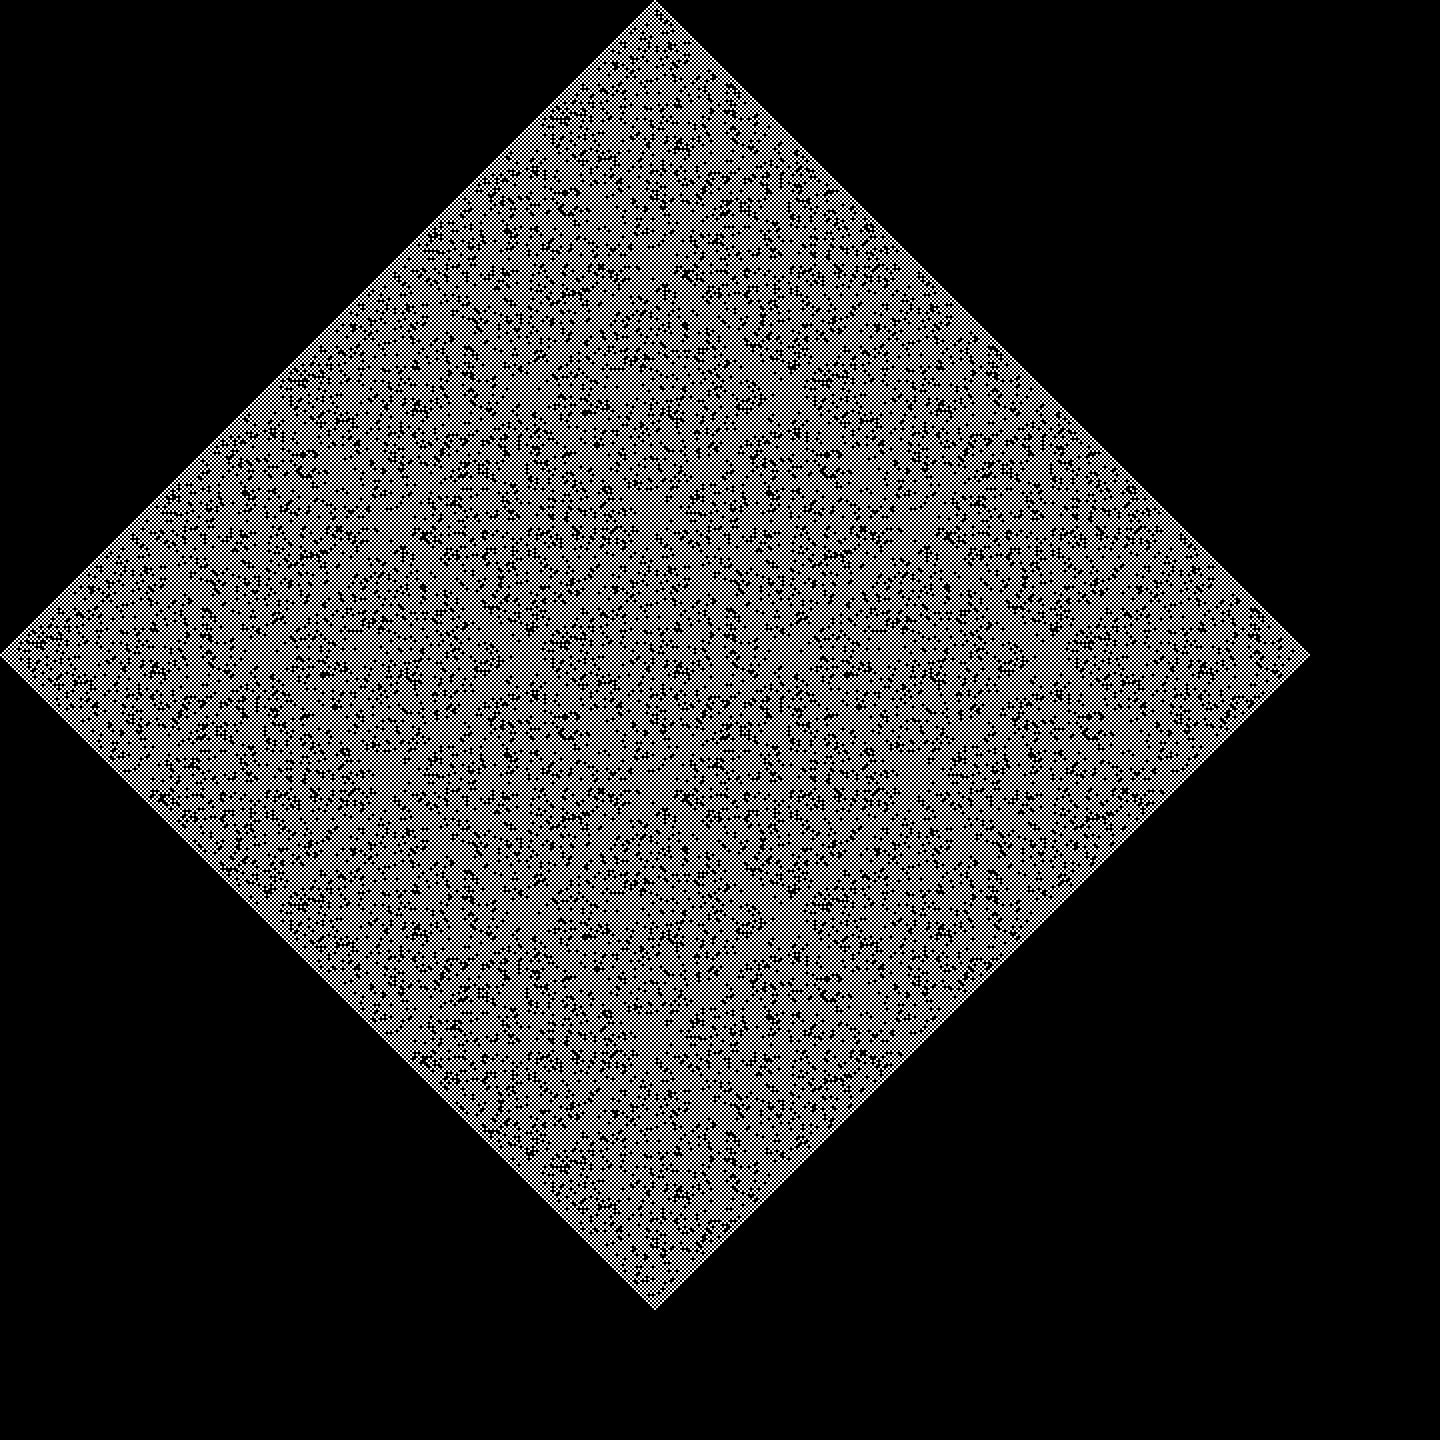

In [7]:
PART2_COUNT = 65 + (131 * 2)
cleanGrid = sourceGrid.copy()
grid = sourceGrid.copy()
cleanGrid[startRow][startCol] = 'O'
minScores = {(startRow, startCol): 0}
positions = [(startRow, startCol)]

for j in range(PART2_COUNT):
    newGrid = [x.copy() for x in cleanGrid]
    newPositions = []
    for position in positions:
        tests = [
            (position[0], position[1]-1),
            (position[0], position[1]+1),
            (position[0]-1, position[1]),
            (position[0]+1, position[1]),
        ]
        for testPos in tests:
            if isRock(*testPos) == False:
                if testPos not in minScores: minScores[testPos] = j+1
                newPositions.append(testPos)
    newPositions = list(set(newPositions))
    positions = newPositions
    # print("count of used Positions", len(newPositions))

# print_grid(grid)
# print("count of used Positions", len(minScores)))
# sum([1 for row in grid for x in row if x == 'O'])

# odds = int(len([s for s in minScores if minScores[s] % 2 == 0]))
# evens = len(minScores) - odds

# print("odds", odds, "evens", evens)
# print("My count", len([position for position in positions if abs(position[0]) + position[1] < 131 and position[1] >=0 and position[1] < 131]))
display(get_img(positions, origin=(int(-1 * PART2_COUNT * 1) + 65, int(-1 * PART2_COUNT * 1) + 65), height = int(PART2_COUNT * 2) + 65+1, width = int(PART2_COUNT * 2) + 65+1, scale=2))

In [8]:
len(positions)

94909

327
3867
0 130 0 130
130 130


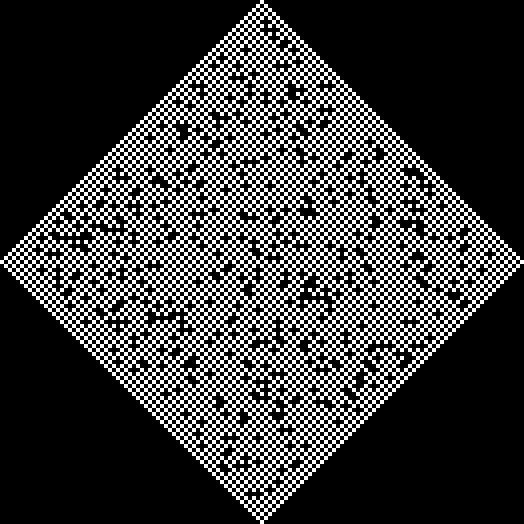

In [9]:
print(PART2_COUNT)
box0positions = [position for position in list(set(positions)) if (abs(position[0] - 65) + abs(position[1] - 65)) <= 65]
print(len(box0positions))
minx = min([x[0] for x in box0positions])
maxx = max([x[0] for x in box0positions])
miny = min([x[1] for x in box0positions])
maxy = max([x[1] for x in box0positions])
print(minx, maxx, miny, maxy)
print(maxx - minx, maxy - miny)
display(get_img(box0positions, origin=(0,0), height = 131, width =131, scale=4))


In [10]:
# import IPython 
def getBox(xoffset, yoffset, verbose = True):
    centerx = xoffset
    centery = yoffset 
    box0positions = [position for position in list(set(positions)) if (abs(position[0] - centerx) + abs(position[1] - centery)) <= 65]
    if(verbose): print(len(box0positions))
    minx = min([x[0] for x in box0positions])
    maxx = max([x[0] for x in box0positions])
    miny = min([x[1] for x in box0positions])
    maxy = max([x[1] for x in box0positions])
    if(verbose): print(minx, maxx, miny, maxy)
    if(verbose): print(maxx - minx, maxy - miny)
    if(verbose): display(get_img(box0positions, origin=(minx, miny), height = maxy - miny + 1, width = maxx - minx + 1, scale=4))
    return box0positions




3867
1 131 1 131
130 130


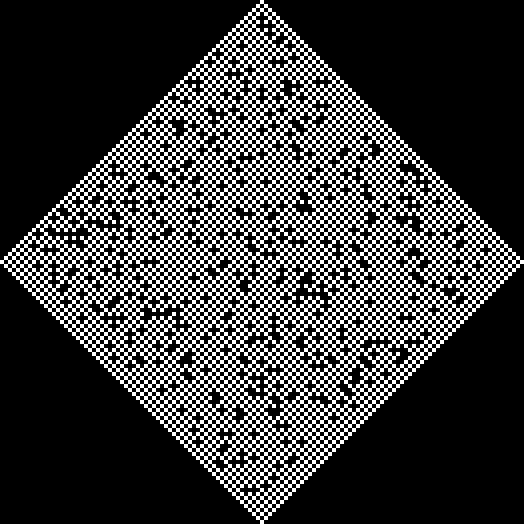

3867


In [11]:
xoffset = 66
yoffset = 66
box0positions = getBox(xoffset,yoffset )
print(len(box0positions))

3791
66 196 66 196
130 130


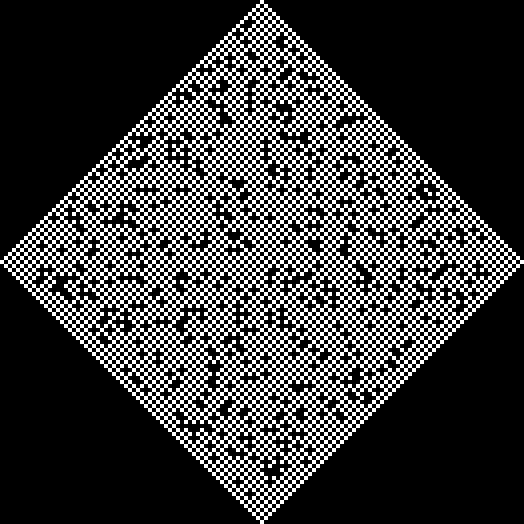

3791


In [12]:
xoffset = 66 + 65
yoffset = 66 + 65
box1positions = getBox(xoffset,yoffset, verbose=True)
print(len(box1positions))

3751
133 261 2 130
128 128


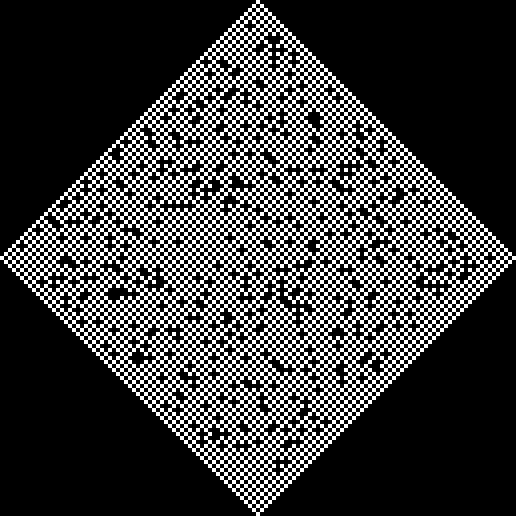

3751


In [13]:
xoffset = 131 + 66
yoffset = 66
box2positions = getBox(xoffset,yoffset, verbose=True)
print(len(box2positions))

3727
67 195 -64 64
128 128


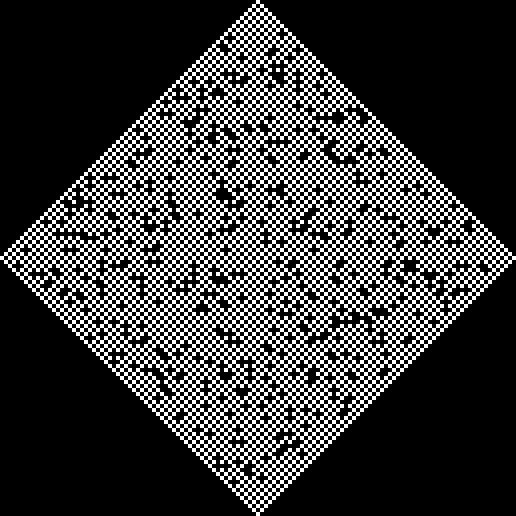

3727


In [14]:
xoffset = 131
yoffset = 0
box3positions = getBox(xoffset,yoffset, verbose=True)
print(len(box3positions))

In [15]:
def get_score(distance):
    zeroes = len(box0positions) * (distance + 1) ** 2
    ones = len(box1positions) * (distance + 1) * distance
    twos = len(box2positions) * distance ** 2
    threes = len(box3positions) * (distance + 1) * distance
    score = zeroes + ones + twos + threes - (distance * (distance + 1))
    return score

## Test on precalculated scores using smaller grids to verify the technique

In [16]:
distance = 2
correct = {2: 94909, 4: 307031, 6:640233}

for c in correct.keys():
    distance = c
    score = get_score(distance)
    error = score - correct[distance]
    if error == 0: print("SUCCESSFUL SCORE",  score, "FOR DISTANCE",distance)
    else: print(c, "error is", error, "vs", (distance * (distance + 1)), "from score", score, "and reference score", correct[distance], )

SUCCESSFUL SCORE 94909 FOR DISTANCE 2
SUCCESSFUL SCORE 307031 FOR DISTANCE 4
SUCCESSFUL SCORE 640233 FOR DISTANCE 6


## Part 2 Final Answer

In [17]:

boxes = int((26501365 - 65)/ 131)

get_score(boxes)


619407349431167